<a href="https://colab.research.google.com/github/Pranav-Nirbhavane/Predicting_Rise_In_Sea_Level_Neural_Network/blob/main/Predicting_rise_in_sea_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting the rise in sea level using neural network

## 1. Using Deep neural network

In [ ]:
pip install seaborn

In [ ]:
pip install -q git+https://github.com/tensorflow/docs

In [ ]:
from __future__ import absolute_import, division,print_function
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2.0-rc3


In [ ]:
glaciers = pd.read_csv("/content/drive/My Drive/MPL/dataset.csv")
glaciers

,GLACIER_ID,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
0,G005930E45041N_3323_SMB,-0.994788,-0.606495,-0.927738,-1.267044,-1.077259,-0.505270,-1.970414,-1.012726,-0.628393,-1.168543,0.429106,0.391006,-0.296483,0.268278,-0.115370,-0.370724,-0.379638,0.276722,-0.604747,-1.651554,-0.595562,-0.317157,-1.578686,-1.417100,-0.733518,-0.750142,-0.633818,-0.825019,0.331805,-0.321554,-1.415504,-1.867902,-1.060568,-1.375051,0.419167,-1.588898,-3.276506
1,G005936E45041N_0_SMB,-2.082745,-1.838228,-2.411074,-1.810584,-2.356503,-1.073677,-2.401086,-1.651658,-1.381850,-1.928812,-0.582708,-0.433849,-1.800998,-0.563413,-1.499646,-2.251416,-0.982918,0.024558,-1.584351,-2.179836,-1.763119,-1.307565,-1.986247,-1.673356,-1.866958,-1.697709,-1.470960,-1.639003,-0.267315,-1.911826,-2.385090,-2.479041,-1.625303,-2.266046,-1.321111,-2.445095,-3.733425
2,G005937E44988N_3457_SMB,-0.655737,-0.231509,-0.481419,-0.412922,-0.453384,-0.097539,-1.262035,-0.365977,-0.328342,-0.532692,0.304580,0.419188,0.056307,0.181085,-0.142641,-0.208253,-0.341037,0.312078,-0.177490,-0.996106,-0.167830,-0.326851,-0.900111,-0.787468,-0.324681,-0.578268,-0.555670,-0.804946,-0.098784,-0.315481,-1.438701,-1.396488,-1.259220,-1.479451,-0.301457,-0.900588,-3.108876
3,G005940E45037N_0_SMB,-0.837734,-0.265781,-0.864415,-1.103393,-1.084941,-0.493306,-1.936260,-1.093086,-0.341315,-1.285710,0.605371,0.619638,-0.023293,0.475657,0.074384,-0.144122,-0.287566,0.420686,-0.519205,-1.649137,-0.416756,-0.028257,-1.650436,-1.523845,-0.741703,-0.689620,-0.623336,-0.404507,0.589429,-0.314191,-1.028482,-2.012099,-1.019950,-1.579557,0.447704,-2.018839,-3.459231
4,G005941E45033N_0_SMB,-0.901333,-0.367678,-0.716750,-1.241720,-1.090476,-0.354810,-1.863036,-1.141987,-0.433659,-1.231238,0.597862,0.505880,-0.167791,0.394922,0.020518,-0.264338,-0.320393,0.296260,-0.476256,-1.595565,-0.587973,-0.143341,-1.529190,-1.510967,-0.753370,-0.714565,-0.578983,-0.592621,0.367237,-0.300315,-1.218520,-1.831937,-1.041657,-1.417778,0.374376,-1.719652,-3.198922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,G006349E44849N_3599_SMB,-1.249911,0.135656,-0.301040,-1.018815,-0.741672,-0.216059,-1.330608,-1.023081,-0.814696,-0.924770,0.706044,0.492867,-0.052261,-0.100415,-0.855360,-0.329192,-0.202014,-0.005906,-0.803181,-1.348637,-0.728017,-0.574792,-1.613169,-0.888382,-0.849035,-0.831884,-0.681444,-0.541780,-0.177813,0.065429,-0.440140,-1.498849,-1.013118,-1.380879,0.971500,-0.854739,-2.228463
296,G006349E44875N_3441_SMB,-1.453803,0.845496,-0.424960,-0.798596,-0.554632,0.112621,-0.543430,-0.955393,-0.408495,-0.897898,0.440347,0.019513,-0.677574,-0.562685,-0.969712,-1.110383,-0.195627,0.495132,-0.768781,-1.300808,-0.530000,-0.735618,-1.484834,-0.352880,-1.305125,-0.528385,-0.642695,-0.553480,0.199601,-0.223622,-0.371975,-1.594318,-1.044277,-1.144086,0.173678,-0.129699,-1.876004
297,G006349E44998N_0_SMB,-1.335747,0.496677,-0.318157,-0.638739,-0.946146,0.188149,-1.025921,-0.848402,0.018513,-1.121220,0.508984,0.318485,-0.715958,-0.201705,-0.382272,-0.668600,-0.318832,0.596085,-0.574968,-1.269942,-0.349813,-0.213590,-1.573098,-0.687505,-1.079589,-0.845692,-0.451529,-0.324769,0.277791,-0.158457,-0.273639,-1.494026,-0.562154,-0.914583,0.719133,0.012862,-2.297111
298,G006349E44998N_3336_SMB,-1.401270,0.479951,-0.367118,-0.679939,-0.952434,0.179250,-1.078512,-0.862680,-0.035351,-1.179552,0.458976,0.234642,-0.792828,-0.274114,-0.502020,-0.781720,-0.319936,0.627362,-0.508344,-1.285787,-0.357062,-0.235876,-1.551774,-0.703543,-1.148055,-0.897679,-0.433364,-0.344092,0.268958,-0.057833,-0.301474,-1.501130,-0.509068,-0.919881,0.710926,0.030033,-2.275872


In [ ]:
glaciers.describe()

,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,-0.942459,0.158822,-0.464253,-0.710698,-0.891504,-0.146561,-1.243015,-0.948916,-0.147573,-1.141315,0.464055,0.450840,-0.354529,0.173104,-0.250422,-0.367067,-0.294227,0.476001,-0.451553,-1.368961,-0.440963,-0.121186,-1.529637,-1.123541,-0.882503,-0.855704,-0.621657,-0.402229,0.396523,-0.219425,-0.606061,-1.568594,-0.732588,-1.057697,0.533288,-0.862513,-2.675177
std,0.397441,0.465937,0.406793,0.361996,0.409320,0.249541,0.424158,0.259701,0.372899,0.313311,0.249087,0.279784,0.403164,0.340558,0.392455,0.400486,0.208303,0.275932,0.302944,0.219000,0.343661,0.308670,0.237022,0.394618,0.279808,0.288396,0.184267,0.265691,0.296314,0.360549,0.422139,0.290687,0.320003,0.333558,0.388483,0.652822,0.483149
min,-2.730245,-2.295471,-2.856358,-2.240393,-2.790879,-1.399425,-2.811019,-2.165284,-1.901045,-2.268921,-1.011744,-1.753520,-2.317194,-1.506208,-2.219157,-2.993194,-2.106474,-0.833406,-2.086643,-2.393421,-2.233319,-2.227652,-2.728908,-2.226918,-2.359711,-2.221244,-1.959971,-2.549736,-1.589903,-2.606173,-3.335602,-3.014135,-2.582602,-3.149831,-2.661237,-2.925283,-4.614794
25%,-1.202987,0.060929,-0.543206,-0.919502,-1.025027,-0.248434,-1.483457,-1.089109,-0.393167,-1.312304,0.356990,0.359242,-0.597123,-0.067137,-0.447975,-0.465078,-0.356291,0.304677,-0.583487,-1.444456,-0.552844,-0.231147,-1.632897,-1.366020,-1.024745,-0.965111,-0.671520,-0.500414,0.289693,-0.283980,-0.780521,-1.663288,-0.912105,-1.238259,0.365379,-1.346220,-2.933627
50%,-0.902820,0.226232,-0.374148,-0.722916,-0.861940,-0.114420,-1.270954,-0.953226,-0.002146,-1.145182,0.491040,0.487371,-0.328880,0.222331,-0.190192,-0.264142,-0.273686,0.471103,-0.455862,-1.338183,-0.432898,-0.065643,-1.535470,-1.126825,-0.832802,-0.827917,-0.598743,-0.378603,0.404456,-0.160060,-0.555819,-1.580912,-0.707652,-1.005188,0.573704,-0.863125,-2.610479
75%,-0.676145,0.337514,-0.232440,-0.555281,-0.681757,-0.014303,-1.021906,-0.795149,0.120914,-0.983190,0.599213,0.579825,-0.104509,0.371734,-0.010640,-0.170041,-0.196056,0.641161,-0.320874,-1.265904,-0.310385,0.054476,-1.428515,-0.886904,-0.719109,-0.688217,-0.544344,-0.251782,0.530894,-0.042648,-0.356337,-1.460758,-0.518744,-0.879410,0.763339,-0.270265,-2.361707
max,-0.046313,1.163477,0.413650,0.484129,0.446429,0.410131,0.047120,0.063143,0.431168,0.172202,1.260662,0.979799,0.693571,1.053237,0.581171,0.366426,0.115211,1.143606,0.318943,-0.142163,0.350997,0.542421,-0.493673,0.204855,-0.048546,0.192326,-0.025644,0.227466,1.039802,0.492060,0.455009,0.127803,0.190208,-0.011517,1.470757,0.543925,-0.083066


In [ ]:
glaciers.dtypes

GLACIER_ID     object
1967          float64
1968          float64
1969          float64
1970          float64
1971          float64
1972          float64
1973          float64
1974          float64
1975          float64
1976          float64
1977          float64
1978          float64
1979          float64
1980          float64
1981          float64
1982          float64
1983          float64
1984          float64
1985          float64
1986          float64
1987          float64
1988          float64
1989          float64
1990          float64
1991          float64
1992          float64
1993          float64
1994          float64
1995          float64
1996          float64
1997          float64
1998          float64
1999          float64
2000          float64
2001          float64
2002          float64
2003          float64
dtype: object

In [ ]:
glaciers = glaciers.drop("GLACIER_ID",axis=1)

## Splitting the data into train and test

Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.


In [ ]:
train_dataset = glaciers.sample(frac=0.8,random_state=0)
test_dataset = glaciers.drop(train_dataset.index)

## Inspecting the data

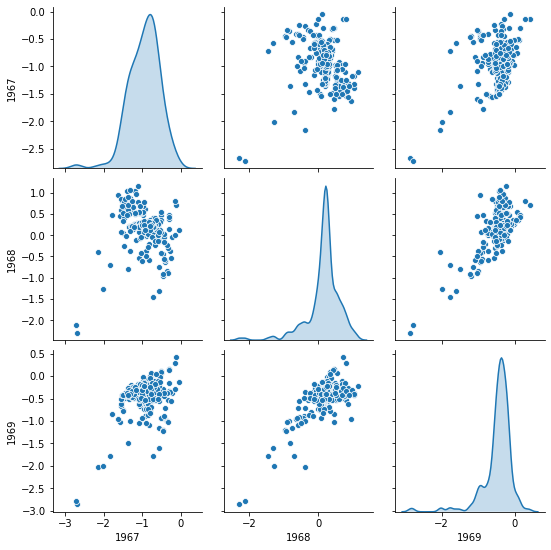

In [ ]:
sns.pairplot(train_dataset[["1967","1968","1969"]], diag_kind="kde");

In [ ]:
len(train_dataset), len(test_dataset)

(240, 60)

In [ ]:
train_dataset.describe()

,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,-0.939223,0.174075,-0.461186,-0.705724,-0.885630,-0.136144,-1.236007,-0.939280,-0.147455,-1.135888,0.470831,0.456233,-0.347114,0.167599,-0.244764,-0.367144,-0.287551,0.480737,-0.446599,-1.366643,-0.437541,-0.116617,-1.525291,-1.107783,-0.875686,-0.846459,-0.615557,-0.397220,0.396343,-0.210469,-0.597488,-1.565741,-0.728466,-1.063484,0.537601,-0.857416,-2.670181
std,0.399098,0.467614,0.403241,0.366669,0.407122,0.254869,0.428439,0.263808,0.379327,0.324012,0.250395,0.255689,0.404454,0.346922,0.392757,0.402088,0.214697,0.287108,0.309566,0.227398,0.345445,0.316577,0.247630,0.401106,0.283552,0.297231,0.191044,0.270996,0.304856,0.357636,0.429455,0.305843,0.326626,0.345033,0.400984,0.675308,0.501117
min,-2.730245,-2.295471,-2.856358,-2.240393,-2.790879,-1.399425,-2.811019,-2.165284,-1.901045,-2.268921,-1.011744,-1.269992,-2.317194,-1.506208,-2.219157,-2.993194,-2.106474,-0.833406,-2.086643,-2.393421,-2.233319,-2.227652,-2.728908,-2.226918,-2.359711,-2.221244,-1.959971,-2.549736,-1.589903,-2.606173,-3.335602,-3.014135,-2.582602,-3.149831,-2.661237,-2.925283,-4.614794
25%,-1.208218,0.060929,-0.534316,-0.923541,-1.016409,-0.238589,-1.469879,-1.089571,-0.390737,-1.306086,0.358003,0.357668,-0.579380,-0.084357,-0.439384,-0.474097,-0.345768,0.306382,-0.575845,-1.444456,-0.563668,-0.217978,-1.624003,-1.323835,-1.012237,-0.956155,-0.666389,-0.500414,0.291959,-0.284171,-0.781726,-1.661062,-0.917646,-1.250791,0.357475,-1.366497,-2.925607
50%,-0.906743,0.221788,-0.385473,-0.712908,-0.853592,-0.110253,-1.258708,-0.945796,-0.003112,-1.146980,0.487636,0.483868,-0.331453,0.209921,-0.181657,-0.275787,-0.264798,0.483599,-0.455862,-1.336181,-0.436100,-0.067537,-1.535393,-1.101687,-0.831272,-0.818379,-0.593056,-0.367312,0.408547,-0.158674,-0.543639,-1.574194,-0.704614,-1.007823,0.591155,-0.846147,-2.597671
75%,-0.671742,0.372538,-0.246335,-0.547555,-0.678515,-0.001765,-0.999739,-0.781273,0.123966,-0.985819,0.604790,0.577434,-0.101071,0.347621,0.006573,-0.170041,-0.195577,0.660942,-0.315020,-1.266349,-0.310385,0.053887,-1.426276,-0.886904,-0.718414,-0.684987,-0.539461,-0.246826,0.532413,-0.035231,-0.353195,-1.467070,-0.511494,-0.879221,0.767919,-0.236599,-2.345944
max,-0.046313,1.163477,0.413650,0.484129,0.446429,0.410131,0.047120,0.063143,0.431168,0.172202,1.260662,0.979799,0.693571,1.053237,0.581171,0.366426,0.115211,1.143606,0.318943,-0.142163,0.350997,0.542421,-0.493673,0.204855,-0.048546,0.192326,-0.025644,0.227466,1.039802,0.492060,0.455009,0.127803,0.136698,-0.011517,1.470757,0.543925,-0.083066


In [ ]:
train_labels = train_dataset.pop('2003')
test_labels = test_dataset.pop('2003')

## Building the model

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape = [len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2368      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 6,593
Trainable params: 6,593
Non-trainable params: 0
_________________________________________________________________


Now try out the model. Take a batch of 10 examples from the training data and call model.predict on it

In [ ]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[0.49855405],
       [0.67339724],
       [0.59796816],
       [0.4232612 ],
       [0.58279103],
       [0.50117064],
       [0.5095068 ],
       [0.43030816],
       [0.768929  ],
       [0.7813482 ]], dtype=float32)

## Training the model

Training the model for 1000  epochs, and record the training and validation accuracy in the history object.

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(train_dataset,
                    train_labels,
                    epochs=EPOCHS, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.004207,0.056575,0.004207,0.032926,0.075512,0.025053,995
996,0.002753,0.045476,0.002753,0.031723,0.100083,0.024936,996
997,0.006366,0.073721,0.006366,0.031745,0.078071,0.023837,997
998,0.001986,0.039267,0.001986,0.031023,0.080183,0.023408,998
999,0.004889,0.065017,0.004889,0.029852,0.088965,0.022852,999


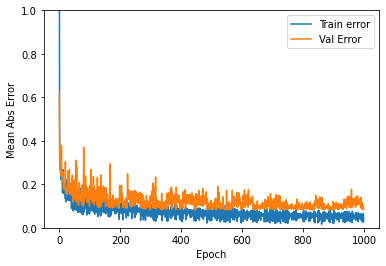

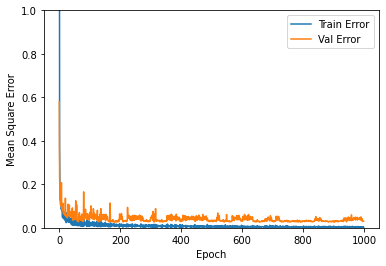

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
  hist = hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],label='Train error')
  plt.plot(hist['epoch'],hist['val_mae'],label = 'Val Error')
  plt.legend()
  plt.ylim([0,1])

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'],hist['mse'],label='Train Error')
  plt.plot(hist['epoch'],hist['val_mse'],label = 'Val Error')
  plt.legend()
  plt.ylim([0,1])

plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(test_dataset,test_labels,verbose=0)
print("Testing set Mean Abs Error:",mae)
print("Testing set Mean Sqr Error:",mse)

Testing set Mean Abs Error: 0.07642614096403122
Testing set Mean Sqr Error: 0.00906670093536377


In [ ]:
test_predictions = model.predict(test_dataset).flatten()
test_predictions

array([-3.6228404, -3.358678 , -3.058409 , -3.4200218, -2.906914 ,
       -2.5614831, -2.5517824, -3.3154116, -3.365279 , -2.9699852,
       -2.4456332, -3.3458083, -3.6329386, -2.7044322, -2.515291 ,
       -2.8998888, -2.5310009, -2.6430361, -2.4931462, -2.4365916,
       -2.8070471, -2.4031827, -2.313718 , -3.1729887, -2.365412 ,
       -3.0157404, -2.8504956, -2.9451945, -2.7268672, -2.6339495,
       -2.9015534, -2.0314517, -2.682381 , -2.2876067, -2.3322384,
       -2.668051 , -2.4217303, -2.728494 , -2.4765813, -2.684552 ,
       -2.1479087, -2.6220157, -2.4446638, -2.5648715, -2.9744995,
       -3.1969464, -2.2931573, -1.9910057, -2.9612734, -2.3500707,
       -2.5382202, -2.7055948, -2.3130438, -2.0065885, -2.75643  ,
       -2.1763709, -3.0893714, -2.323524 , -2.3419774, -2.4763691],
      dtype=float32)

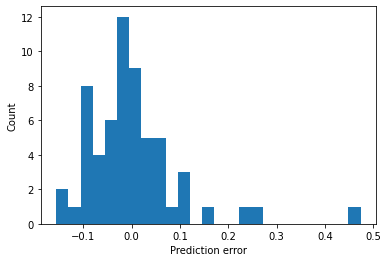

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction error")
_ = plt.ylabel("Count")

In [ ]:
model.evaluate(test_dataset,test_labels)

2/2 [==============================] - 0s 1ms/step - loss: 0.0102 - mae: 0.0654 - mse: 0.0101


[0.01016246434301138, 0.06537700444459915, 0.010065012611448765]

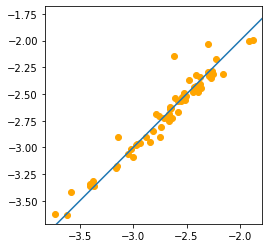

In [ ]:
plt.scatter(x= test_labels, y = test_predictions,c =['orange'])
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-10,10],[-10,10])


## 2. Using scikitlearn model

RandomForestRegressor

In [ ]:
glaciers

,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
0,-0.994788,-0.606495,-0.927738,-1.267044,-1.077259,-0.505270,-1.970414,-1.012726,-0.628393,-1.168543,0.429106,0.391006,-0.296483,0.268278,-0.115370,-0.370724,-0.379638,0.276722,-0.604747,-1.651554,-0.595562,-0.317157,-1.578686,-1.417100,-0.733518,-0.750142,-0.633818,-0.825019,0.331805,-0.321554,-1.415504,-1.867902,-1.060568,-1.375051,0.419167,-1.588898,-3.276506
1,-2.082745,-1.838228,-2.411074,-1.810584,-2.356503,-1.073677,-2.401086,-1.651658,-1.381850,-1.928812,-0.582708,-0.433849,-1.800998,-0.563413,-1.499646,-2.251416,-0.982918,0.024558,-1.584351,-2.179836,-1.763119,-1.307565,-1.986247,-1.673356,-1.866958,-1.697709,-1.470960,-1.639003,-0.267315,-1.911826,-2.385090,-2.479041,-1.625303,-2.266046,-1.321111,-2.445095,-3.733425
2,-0.655737,-0.231509,-0.481419,-0.412922,-0.453384,-0.097539,-1.262035,-0.365977,-0.328342,-0.532692,0.304580,0.419188,0.056307,0.181085,-0.142641,-0.208253,-0.341037,0.312078,-0.177490,-0.996106,-0.167830,-0.326851,-0.900111,-0.787468,-0.324681,-0.578268,-0.555670,-0.804946,-0.098784,-0.315481,-1.438701,-1.396488,-1.259220,-1.479451,-0.301457,-0.900588,-3.108876
3,-0.837734,-0.265781,-0.864415,-1.103393,-1.084941,-0.493306,-1.936260,-1.093086,-0.341315,-1.285710,0.605371,0.619638,-0.023293,0.475657,0.074384,-0.144122,-0.287566,0.420686,-0.519205,-1.649137,-0.416756,-0.028257,-1.650436,-1.523845,-0.741703,-0.689620,-0.623336,-0.404507,0.589429,-0.314191,-1.028482,-2.012099,-1.019950,-1.579557,0.447704,-2.018839,-3.459231
4,-0.901333,-0.367678,-0.716750,-1.241720,-1.090476,-0.354810,-1.863036,-1.141987,-0.433659,-1.231238,0.597862,0.505880,-0.167791,0.394922,0.020518,-0.264338,-0.320393,0.296260,-0.476256,-1.595565,-0.587973,-0.143341,-1.529190,-1.510967,-0.753370,-0.714565,-0.578983,-0.592621,0.367237,-0.300315,-1.218520,-1.831937,-1.041657,-1.417778,0.374376,-1.719652,-3.198922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1.249911,0.135656,-0.301040,-1.018815,-0.741672,-0.216059,-1.330608,-1.023081,-0.814696,-0.924770,0.706044,0.492867,-0.052261,-0.100415,-0.855360,-0.329192,-0.202014,-0.005906,-0.803181,-1.348637,-0.728017,-0.574792,-1.613169,-0.888382,-0.849035,-0.831884,-0.681444,-0.541780,-0.177813,0.065429,-0.440140,-1.498849,-1.013118,-1.380879,0.971500,-0.854739,-2.228463
296,-1.453803,0.845496,-0.424960,-0.798596,-0.554632,0.112621,-0.543430,-0.955393,-0.408495,-0.897898,0.440347,0.019513,-0.677574,-0.562685,-0.969712,-1.110383,-0.195627,0.495132,-0.768781,-1.300808,-0.530000,-0.735618,-1.484834,-0.352880,-1.305125,-0.528385,-0.642695,-0.553480,0.199601,-0.223622,-0.371975,-1.594318,-1.044277,-1.144086,0.173678,-0.129699,-1.876004
297,-1.335747,0.496677,-0.318157,-0.638739,-0.946146,0.188149,-1.025921,-0.848402,0.018513,-1.121220,0.508984,0.318485,-0.715958,-0.201705,-0.382272,-0.668600,-0.318832,0.596085,-0.574968,-1.269942,-0.349813,-0.213590,-1.573098,-0.687505,-1.079589,-0.845692,-0.451529,-0.324769,0.277791,-0.158457,-0.273639,-1.494026,-0.562154,-0.914583,0.719133,0.012862,-2.297111
298,-1.401270,0.479951,-0.367118,-0.679939,-0.952434,0.179250,-1.078512,-0.862680,-0.035351,-1.179552,0.458976,0.234642,-0.792828,-0.274114,-0.502020,-0.781720,-0.319936,0.627362,-0.508344,-1.285787,-0.357062,-0.235876,-1.551774,-0.703543,-1.148055,-0.897679,-0.433364,-0.344092,0.268958,-0.057833,-0.301474,-1.501130,-0.509068,-0.919881,0.710926,0.030033,-2.275872


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
grid = {"n_estimators":[10,100,200,500,1000,2000],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],"min_samples_leaf":[1,2,4]}

#Setting the random seed
np.random.seed(42)

#Create the data
X = glaciers.drop("2003",axis = 1)
Y = glaciers["2003"]

#Splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Setting the model
model = RandomForestRegressor()

#Setup RandomizedSearchCV
rs_model = RandomizedSearchCV(estimator = model,
                             param_distributions = grid,
                             n_iter=10,cv=5,verbose=2)

#Fit the randomizedSearchCv version of model
rs_model.fit(X_train,Y_train);

#Make predictions
Y_preds = rs_model.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.6s finished


In [ ]:
#Evaluating the model
rs_model.score(X_test,Y_test)

0.7542572460301096

In [ ]:
Y_preds

array([-2.26736032, -3.10669882, -2.4790602 , -3.35420884, -2.36878673,
       -2.79758634, -2.44097863, -2.60665462, -3.07174295, -2.76318418,
       -2.28296919, -2.78838034, -2.63626852, -2.55474151, -2.55607621,
       -2.25419726, -2.61742705, -2.5277772 , -2.62262127, -2.86844013,
       -3.0667104 , -2.5726963 , -1.64704757, -2.46074719, -2.97897427,
       -2.99703003, -2.46133401, -2.42255582, -2.64431733, -2.66699304,
       -3.03921446, -2.22920757, -2.63871077, -2.78147986, -2.48904385,
       -2.52085118, -3.19179188, -3.6342916 , -3.13302707, -2.87210005,
       -2.73957351, -2.31218255, -2.55901666, -2.69187528, -2.81639198,
       -2.7633694 , -2.39130618, -2.69071329, -2.84268233, -2.87951941,
       -2.79549267, -2.27863783, -2.54907725, -2.5693238 , -2.29696995,
       -2.43581728, -2.60952771, -2.90308925, -2.46937464, -3.346373  ])

In [ ]:
print("Regression model metrics on the test set")
print(f"R^2 :{r2_score(Y_test,Y_preds)}")
print(f"Mean absolute error :{mean_absolute_error(Y_test,Y_preds)}")
print(f"Mean squared error :{mean_squared_error(Y_test,Y_preds)}")

Regression model metrics on the test set
R^2 :0.7542572460301096
Mean absolute error :0.12423546481965604
Mean squared error :0.05985808858927923


In [ ]:
df = pd.DataFrame(data={"Actual values":Y_test,"Predicted values":Y_preds})
df["Difference"] = df["Predicted values"]- df["Actual values"]
df

,Actual values,Predicted values,Difference
203,-2.241326,-2.267360,-0.026034
266,-2.923230,-3.106699,-0.183469
152,-2.516857,-2.479060,0.037796
9,-3.404712,-3.354209,0.050503
233,-2.129763,-2.368787,-0.239024
226,-2.817885,-2.797586,0.020299
196,-2.447005,-2.440979,0.006026
109,-2.673922,-2.606655,0.067268
5,-3.081433,-3.071743,0.009690
175,-2.803767,-2.763184,0.040583


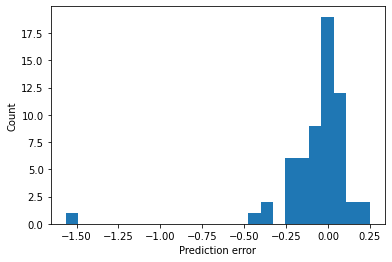

In [ ]:
difference = df["Predicted values"]- df["Actual values"]
plt.hist(difference, bins = 25)
plt.xlabel("Prediction error")
_ = plt.ylabel("Count")

## Evaluation of the two models

Prediction Error

1. Neural Network

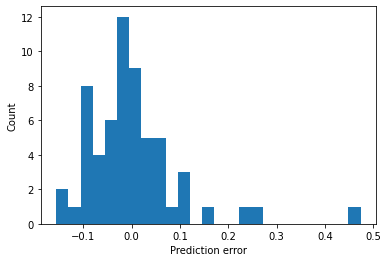

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction error")
_ = plt.ylabel("Count")

2. Scikit Learn Model

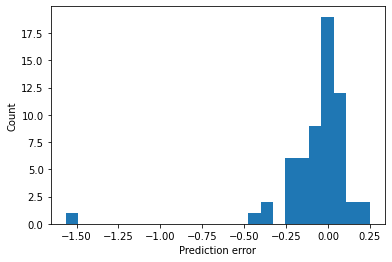

In [ ]:
difference = df["Predicted values"]- df["Actual values"]
plt.hist(difference, bins = 25)
plt.xlabel("Prediction error")
_ = plt.ylabel("Count")